# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint
from datetime import datetime

# Import API key
from config import Weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/weather_api.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

In [3]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [4]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [5]:
# Print the city count to confirm sufficient count
len(cities)

639

## Perform API Calls

In [7]:
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
target_url = url + Weather_key
target_url

'http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=508d0cd8da5b49cf05907328896cb2eb'

In [10]:
weather_response = requests.get(target_url)
weather_json = weather_response.json()
# print(json.dumps(weather_json, indent=4, sort_keys=True))

In [11]:
#print(weather_json['city']['name'])
print(weather_json['city']['name'])

Moscow


In [12]:
# set up lists to hold reponse info
cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0

#  response = requests.get(query_url + city).json()
    
# Loop through the list of cities and perform a request for data on each

for city in cities:
    weather_response = requests.get(target_url + "&q=" + city + "&units=Imperial")
    weather_json = weather_response.json()
    try:
        cityname.append(weather_json['city']['name'])
        cloudiness.append(weather_json['list'][0]['clouds']['all'])
        country.append(weather_json['city']['country'])
        date.append(weather_json['list'][0]['dt'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        lat.append(weather_json['city']['coord']['lat'])
        lng.append(weather_json['city']['coord']['lon'])
        max_temp.append(weather_json['list'][0]['main']['temp_max'])
        wind_speed.append(weather_json['list'][0]['wind']['speed'])
        count = count + 1
        print(f"Processing record {count} of Set 1 | {city}")
    except:
        print("not found") 
        pass

Processing record 1 of Set 1 | monrovia
Processing record 2 of Set 1 | oktyabrskiy
Processing record 3 of Set 1 | barrow
Processing record 4 of Set 1 | capitan bado
Processing record 5 of Set 1 | bambous virieux
not found
Processing record 6 of Set 1 | bama
Processing record 7 of Set 1 | nishihara
Processing record 8 of Set 1 | tuktoyaktuk
Processing record 9 of Set 1 | mar del plata
Processing record 10 of Set 1 | puerto ayora
Processing record 11 of Set 1 | butaritari
Processing record 12 of Set 1 | saint-philippe
Processing record 13 of Set 1 | kahului
Processing record 14 of Set 1 | dingle
Processing record 15 of Set 1 | busselton
Processing record 16 of Set 1 | mahon
not found
Processing record 17 of Set 1 | rikitea
Processing record 18 of Set 1 | magadan
Processing record 19 of Set 1 | burnie
Processing record 20 of Set 1 | vaini
Processing record 21 of Set 1 | bonavista
not found
Processing record 22 of Set 1 | avarua
Processing record 23 of Set 1 | banda aceh
Processing record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
# Convert array of JSONs into Pandas DataFrame

weather_dictionary = {"City": cityname,"Latitude": lat, "Longitude":lng,
                "Max Temp":max_temp,"Humidity":humidity,"Cloudiness":cloudiness,
                "Wind Speed":wind_speed,"Country":country, "Date":date}
weather_data = pd.DataFrame(weather_dictionary)
weather_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Monrovia,6.3005,-10.7969,79.66,79,99,9.78,LR,1649062800
1,Oktyabr'skiy,54.4815,53.4710,38.14,100,100,3.44,RU,1649062800
2,Barrow,71.2906,-156.7887,-2.18,78,100,8.52,US,1649062800
3,Capitán Bado,-23.2667,-55.5333,68.63,89,37,6.69,PY,1649062800
4,Bambous Virieux,-20.3428,57.7575,82.65,78,75,16.28,MU,1649062800


In [14]:
# Export the City_Data into a csv
weather_data.to_csv("../output_data/weather_api.csv")
# Show Record Count
countforme = len(weather_data)
countforme

586

In [15]:
# Display the City Data Frame
weather_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Monrovia,6.3005,-10.7969,79.66,79,99,9.78,LR,1649062800
1,Oktyabr'skiy,54.4815,53.4710,38.14,100,100,3.44,RU,1649062800
2,Barrow,71.2906,-156.7887,-2.18,78,100,8.52,US,1649062800
3,Capitán Bado,-23.2667,-55.5333,68.63,89,37,6.69,PY,1649062800
4,Bambous Virieux,-20.3428,57.7575,82.65,78,75,16.28,MU,1649062800


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

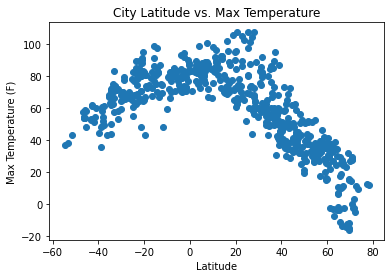

In [29]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
# Save the figure
# Show plot
scatlat = weather_data["Latitude"]
scattemp = weather_data["Max Temp"]

plt.scatter(scatlat,scattemp)
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('scatplotlatitudemaxtemp')
plt.savefig('../output_data/Latvs.Temp.png')
plt.show()

## Latitude vs. Humidity Plot

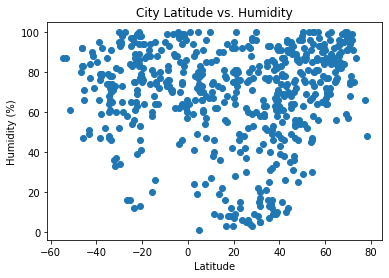

In [30]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
# Save the figure
# Show plot

#scatlat = weather_data["Latitude"]
scathum = weather_data["Humidity"]

plt.scatter(scatlat,scathum)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('scatplotlatitudehumidity')
plt.savefig('../output_data/Latvs.Hum.png')
plt.show()

## Latitude vs. Cloudiness Plot

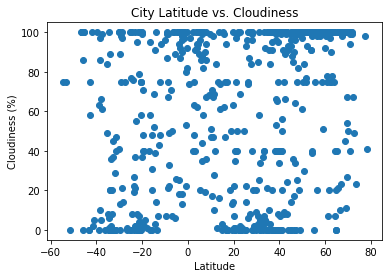

In [31]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
# Save the figure
# Show plot
#scatlat = weather_data["Latitude"]
scatcloud = weather_data["Cloudiness"]

plt.scatter(scatlat,scatcloud)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('scatplotlatitudecloudiness')
plt.savefig('../output_data/Latvs.Cloud.png')
plt.show()

## Latitude vs. Wind Speed Plot

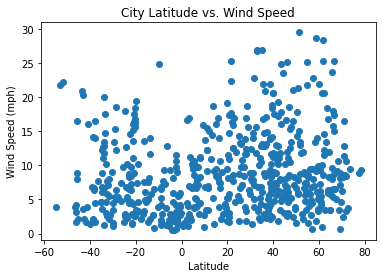

In [32]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
# Save the figure
# Show plot

#scatlat = weather_data["Latitude"]
scatwindsp = weather_data["Wind Speed"]

plt.scatter(scatlat,scatwindsp)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('scatplotlatitudewindspeed')
plt.savefig('../output_data/Latvs.Wind.png')
plt.show()

## Linear Regression

In [33]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

# Create Northern and Southern Hemisphere DataFrames
northlat_df = weather_data.loc[weather_data["Latitude"] >= 0,:]
southlat_df = weather_data.loc[weather_data["Latitude"] < 0,:]

northlat_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Monrovia,6.3005,-10.7969,79.66,79,99,9.78,LR,1649062800
1,Oktyabr'skiy,54.4815,53.4710,38.14,100,100,3.44,RU,1649062800
2,Barrow,71.2906,-156.7887,-2.18,78,100,8.52,US,1649062800
5,Bama,11.5221,13.6856,96.01,9,69,3.53,NG,1649062800
6,Nishihara,26.1842,127.7558,68.50,60,75,13.18,JP,1649062800


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.873347406166905


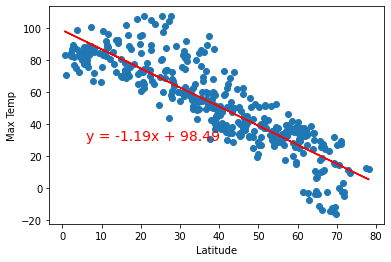

<Figure size 432x288 with 0 Axes>

In [34]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))
plt.savefig('../output_data/northerntemplat')
plt.savefig('northerntemplat')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.660970297948489


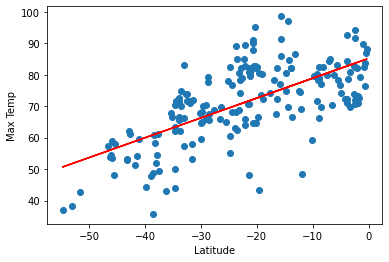

<Figure size 432x288 with 0 Axes>

In [35]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))
plt.savefig('../output_data/southerntemplat')
plt.savefig('southerntemplat')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.30765387840664776


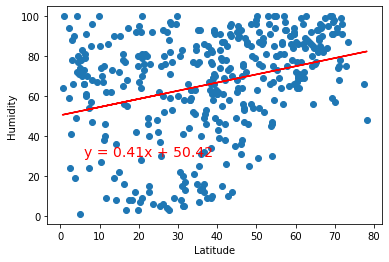

<Figure size 432x288 with 0 Axes>

In [36]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))
plt.savefig('../output_data/northernhumlat')
plt.savefig('northernhumlat')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1467121882715319


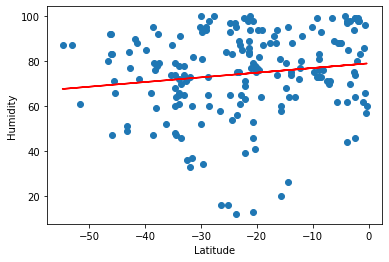

<Figure size 432x288 with 0 Axes>

In [37]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))
plt.savefig('../output_data/southernhumlat')
plt.savefig('southernhumlat')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1928587558181795


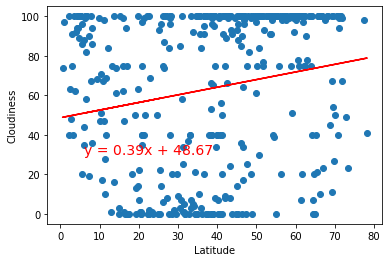

In [38]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Cloudiness"]
plt.savefig('../output_data/northerncloudlat')
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.19736937709163976


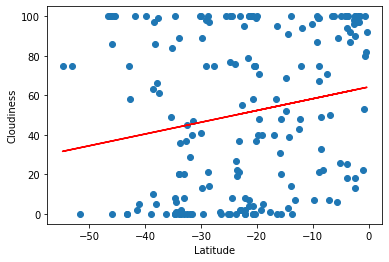

<Figure size 432x288 with 0 Axes>

In [39]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))
plt.savefig('../output_data/southerncloudlat')
plt.savefig('southerncloudlat')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08035155009203974


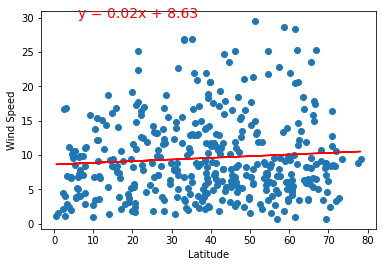

In [40]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Wind Speed"]
plt.savefig('../output_data/northernwindlat')
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2530206721313965


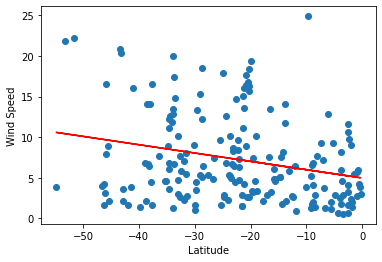

<Figure size 432x288 with 0 Axes>

In [41]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))
plt.savefig('../output_data/southernwindlat')
plt.savefig('southernwindlat')
